In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

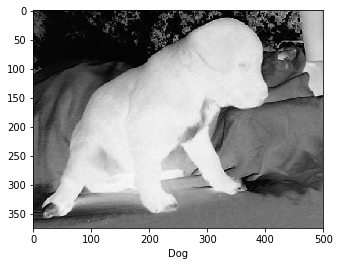

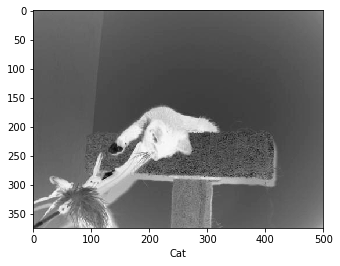

In [5]:
categories=['Dog','Cat']
datadir= "datasets/PetImages"

for category in categories:
    path=os.path.join(datadir, category)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap=plt.cm.binary)
        plt.xlabel(category)
        plt.show()
        break; #show an image from each category

In [6]:
print(image.shape) #image shape

(375, 500)


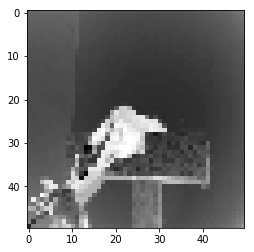

In [7]:
im_size = 50 # 50x50 size for all images. Resize images using cv2
new_image = cv2.resize(image, (im_size, im_size))
plt.imshow(new_image, cmap=plt.cm.binary)

In [8]:
#create your dataset

data = []

def create_dataset():
    
    for category in categories:
        path=os.path.join(datadir, category)
        cat_class = categories.index(category)
        for img in os.listdir(path):
            try:
                image=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_image=cv2.resize(image, (im_size, im_size))
                data.append([new_image, cat_class]) #append image with label. Labels are numbers, always
            except:
                pass

create_dataset()

In [9]:
print(len(data))
count = 0
for item in data:
    if item[1] == 1:
        count=count+1
print("Class split : ",count, len(data)-count)

24946
('Class split : ', 12476, 12470)


In [11]:
# shuffle data to randomize stuff

import random
random.shuffle(data)

#check if data is shuffled right
for sample in data[:10]:
    print( sample[1])

0
1
0
0
1
1
0
0
0
0


In [13]:
x,y=[],[] #image and labels

for im,label in data:
    x.append(im)
    y.append(label)

In [17]:
#x is always a numpy array.

import numpy as np

x=np.array(x).reshape(-1, im_size, im_size, 1) # 1 shows grayscale, [number of channels]. RGB would be 3;
                                      # -1 is a catch-all clause


In [18]:
#avoid rebuilding datasets everytime, so binarize and save them

import pickle

X_pickle = open('Cat_X.pickle', 'wb')
pickle.dump(x, X_pickle)
X_pickle.close()

Y_pickle = open('Cat_Y.pickle', 'wb')
pickle.dump(y, Y_pickle)
Y_pickle.close()

In [19]:
#load them once again to check if they work well.

x = pickle.load(open('Cat_X.pickle','rb'))
y = pickle.load(open('Cat_Y.pickle','rb'))

In [20]:
#scale or normalize data. Scale using x = x/255
#since image values vary from 0-255.

from keras.utils import normalize

x=normalize(x, axis=1)

In [21]:
x[1]

array([[[0.1441227 ],
        [0.14025699],
        [0.1415069 ],
        ...,
        [0.17687837],
        [0.18022464],
        [0.19572593]],

       [[0.13511503],
        [0.13166983],
        [0.13883695],
        ...,
        [0.19196102],
        [0.17889946],
        [0.18902299]],

       [[0.12160353],
        [0.12308267],
        [0.13082713],
        ...,
        [0.17276491],
        [0.17757428],
        [0.19036358]],

       ...,

       [[0.25972112],
        [0.24187175],
        [0.24429964],
        ...,
        [0.20155907],
        [0.182875  ],
        [0.15416769]],

       [[0.23870322],
        [0.24902772],
        [0.2322849 ],
        ...,
        [0.17413606],
        [0.17624909],
        [0.15684886]],

       [[0.23720194],
        [0.23757817],
        [0.22427508],
        ...,
        [0.15356881],
        [0.16697283],
        [0.18232005]]])

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation, MaxPooling2D
from keras.layers import Dropout

In [26]:
print(x[0].shape)
print(x.shape[1:])

(50, 50, 1)
(50, 50, 1)


In [32]:
#build model
#CNNs are generally (conv -> activation -> maxpooling) || (conv -> maxpooling -> activation)  format

model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=x[0].shape)) # 3x3 is the kernel size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
          
model.add(Flatten()) #combine all feature maps to form only 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu')) #add activations after dense, else they become linear activations
model.add(Dense(1, activation='sigmoid')) #one neuron to decide Cat or Dog

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(x,y, validation_split=0.3, batch_size=32, epochs=1) #test

Train on 17462 samples, validate on 7484 samples
Epoch 1/1
17462/17462 [==============================] - 243s 14ms/step - loss: 0.6656 - acc: 0.5869 - val_loss: 0.6285 - val_acc: 0.6371


In [31]:
model.fit(x,y, validation_split=0.3, batch_size=32, epochs=10) #train it well

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 235s 13ms/step - loss: 0.6152 - acc: 0.6721 - val_loss: 0.5925 - val_acc: 0.6945
Epoch 2/10
17462/17462 [==============================] - 238s 14ms/step - loss: 0.5661 - acc: 0.7105 - val_loss: 0.5396 - val_acc: 0.7322
Epoch 3/10
17462/17462 [==============================] - 237s 14ms/step - loss: 0.5202 - acc: 0.7442 - val_loss: 0.5346 - val_acc: 0.7346
Epoch 4/10
17462/17462 [==============================] - 237s 14ms/step - loss: 0.4871 - acc: 0.7672 - val_loss: 0.5083 - val_acc: 0.7491
Epoch 5/10
17462/17462 [==============================] - 237s 14ms/step - loss: 0.4644 - acc: 0.7810 - val_loss: 0.4929 - val_acc: 0.7631
Epoch 6/10
17462/17462 [==============================] - 239s 14ms/step - loss: 0.4404 - acc: 0.7948 - val_loss: 0.5048 - val_acc: 0.7539
Epoch 7/10
17462/17462 [==============================] - 239s 14ms/step - loss: 0.4168 - acc: 0.8072 - val_loss: 0.4

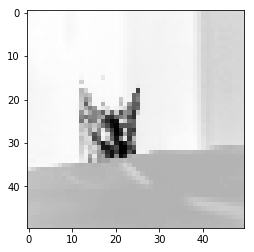

[[0.99906224]]


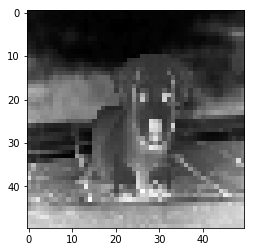

[[0.999997]]


In [47]:
#test your classifier with a random images.

new_image = cv2.imread('cat_image.jpg', cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (50,50) )
plt.imshow(new_image, cmap=plt.cm.binary)
plt.show()
new_image=np.array(new_image).reshape(-1, im_size, im_size, 1)
# print(new_image.shape)
pred_label_1 = model.predict([new_image])
print(pred_label_1)

new_image = cv2.imread('dog_image.jpg', cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (50,50) )
plt.imshow(new_image, cmap=plt.cm.binary)
plt.show()
new_image=np.array(new_image).reshape(-1, im_size, im_size, 1)
# print(new_image.shape)
pred_label_2 = model.predict(new_image)
print(pred_label_2)